# FALL 2020 -> CSE 6363 -> Machine Learning
## Assignment 3
### Problem 1
### Name:  Tirumala Manukonda (UTA ID# 1001662386)

#### (Non-parameteric density estimation )Kernel Density Estimation
__Summary__:
- Write the function [p, x] = mykde(X,h) for 1D data that perfroms the kernel density estimation on data X with the
  bandwidth parameters of h
- Generate Random data with the given mu1 = 5  and sigma1 =1 values for N = 1000, perform the mykde with parameters of h
- Generate Random data with the given mu1 = 5  and sigma1 =1, mu2 = 0  and sigma2 =0.2 values for N = 1000, perform the mykde     with parameters of h
- Generate 2 sets of 2-D Gaussian random data with N1 = 500 and N2 = 500 , µ1 = [1, 0], µ2 = [0, 2.5] and sig1, sig2.
- Implement 2D mykde function, which perfroms the kernel density estimation on data X with the
  bandwidth parameters of h

In [470]:
import pandas as pd
import numpy as np
from numpy import random
import math
from math import sin, cos, pi
import scipy as sp
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D


In [436]:
#Generate random data
X = np.random.normal(5, 1, 1000)

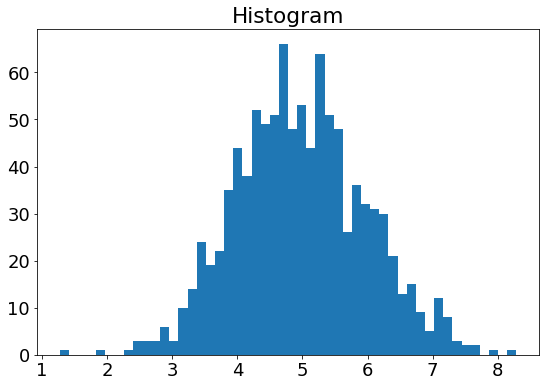

In [437]:
#Histogram visualization of the data to get idea of the data
plt.hist(X, bins=50)
plt.title('Histogram')
plt.show()

In [441]:
# Implement my_kde function for non-parameteric estimation

def my_kde(data, h=1, gridsize=100, normalized=True, bounds=None):
    
    # boundaries
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) - 3 * h
        xmax = max(data) + 3 * h

    # grid points
    x = np.linspace(xmin, xmax, gridsize)

    # compute kde
    kde = np.zeros(gridsize)
    for val in data:
        kde += norm.pdf(x, loc=val, scale=h)

    # normalized the KDE
    if normalized:
        kde /= sp.integrate.simps(kde, x)


    return x,kde

In [442]:
#1D kernel density function ,[p, x] = mykde(X,h) 

x, p = my_kde(X, h = 0.1)


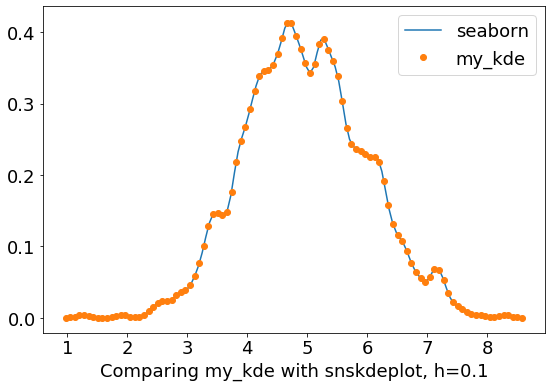

In [445]:
#Plotting my_kde vs snskdepplot
ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot, h=0.1",
                  kde_kws=dict(gridsize=100, bw= 0.1, label="seaborn"))
ax.plot(x, p, "o", label="my_kde")
plt.legend();

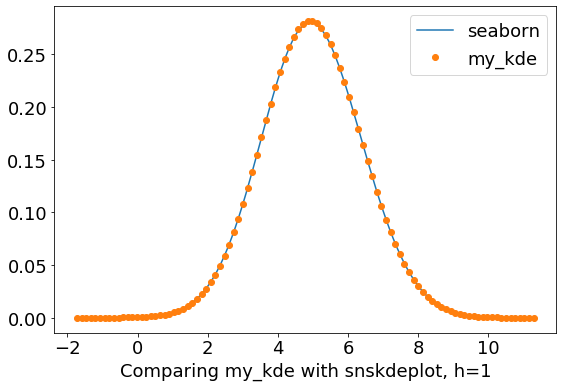

In [446]:
#"Comparing my_kde vs snskdeplot, h=1"
x, p = my_kde(X, h = 1)
ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot, h=1",
                  kde_kws=dict(gridsize=100, bw= 1, label="seaborn"))
ax.plot(x, p, "o", label="my_kde")
plt.legend();

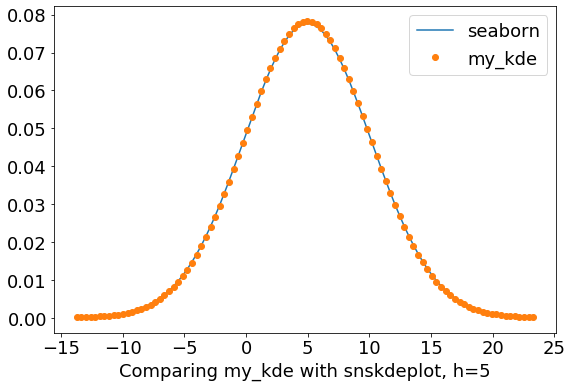

In [448]:
#Comparing my_kde with snskdeplot, h=5
x, p = my_kde(X, h = 5)
ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot, h=5",
                  kde_kws=dict(gridsize=100, bw= 5, label="seaborn"))
ax.plot(x, p, "o", label="my_kde")
plt.legend();

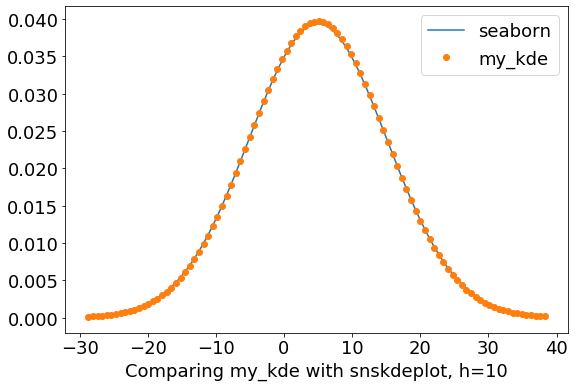

In [449]:
#"Comparing my_kde with snskdeplot, h=10"
x, p = my_kde(X, h = 10)
ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot, h=10",
                  kde_kws=dict(gridsize=100, bw= 10, label="seaborn"))
ax.plot(x, p, "o", label="my_kde")
plt.legend();

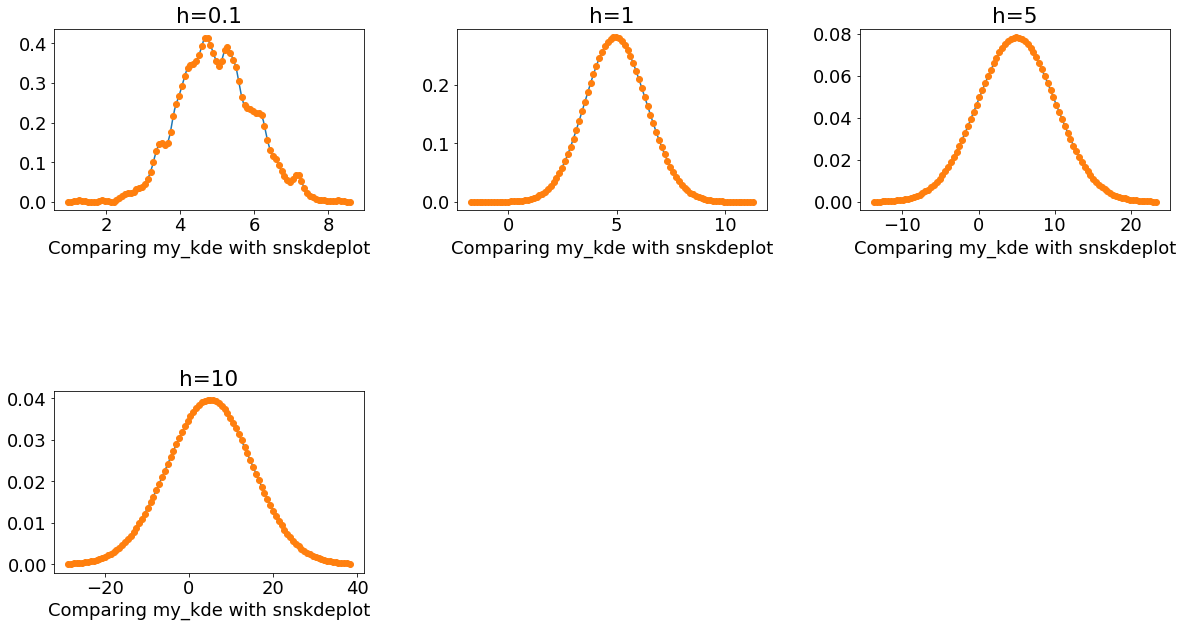

In [451]:
# visualizing the h values in the range [0.1, 1, 5, 10]
bandwidths = [0.1, 1, 5, 10]
fig, ax = plt.subplots(4, figsize=(20, 10))
plt_ind = np.arange(4) + 231

for b, ind in zip(bandwidths, plt_ind):
    x, p = my_kde(X, h = b)
    plt.subplot(ind)
    ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot",
                  kde_kws=dict(gridsize=100, bw= b))
    ax.plot(x, p, "o")
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=1, wspace=.3)
plt.show()

#### _Analysis_ :- The above graph shows the smoothening of the curve as the bandwidth increases, with low bandwidth the graph is precise with every point on the graph and the curve starts smoothening as the bandwidth increases

In [453]:
# Generate random variabes using X1 and X2 
X1 = np.random.normal(5, 1, 1000)
X2 = np.random.normal(0, 0.2, 1000)
X = np.concatenate([X1, X2])
X.shape

(2000,)

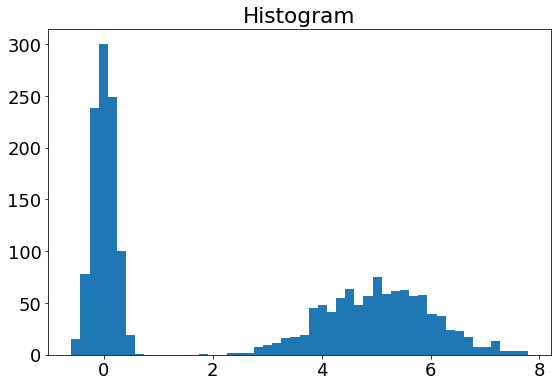

In [454]:
# visualize the histogram plot of the data
plt.hist(X, bins=50)
plt.title('Histogram')
plt.show()

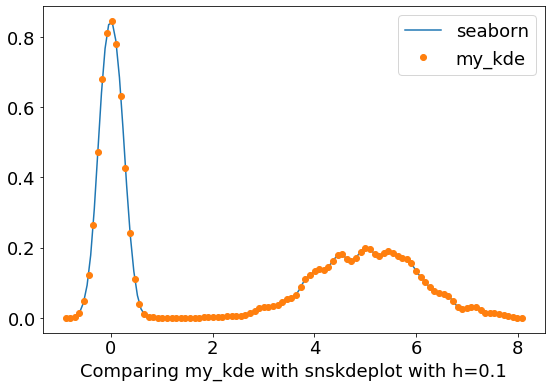

In [455]:
# Comparing my_kde with snskdeplot with h=0.1

x, p = my_kde(X, h =  0.1)
ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot with h=0.1",
                  kde_kws=dict(gridsize=100, bw= 0.1, label="seaborn"))
ax.plot(x, p, "o", label="my_kde")
plt.legend();

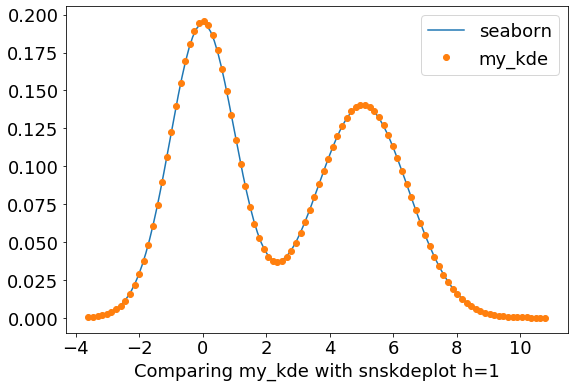

In [456]:
#Comparing my_kde with snskdeplot h=1
x, p = my_kde(X, h =1)
ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot h=1",
                  kde_kws=dict(gridsize=100, bw= 1, label="seaborn"))
ax.plot(x, p, "o", label="my_kde")
plt.legend();

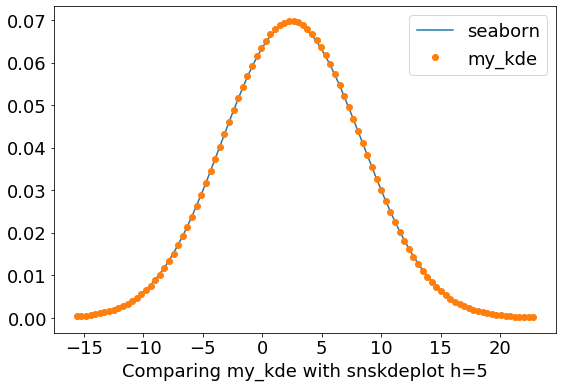

In [457]:
#Comparing my_kde with snskdeplot h=5
x, p = my_kde(X, h = 5)
ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot h=5",
                  kde_kws=dict(gridsize=100, bw= 5, label="seaborn"))
ax.plot(x, p, "o", label="my_kde")
plt.legend();

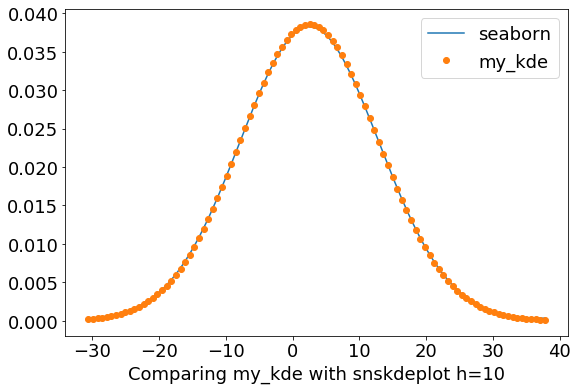

In [458]:
#Comparing my_kde with snskdeplot h=10
x, p = my_kde(X, h =10)
ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot h=10",
                  kde_kws=dict(gridsize=100, bw= 10, label="seaborn"))
ax.plot(x, p, "o", label="my_kde")
plt.legend();

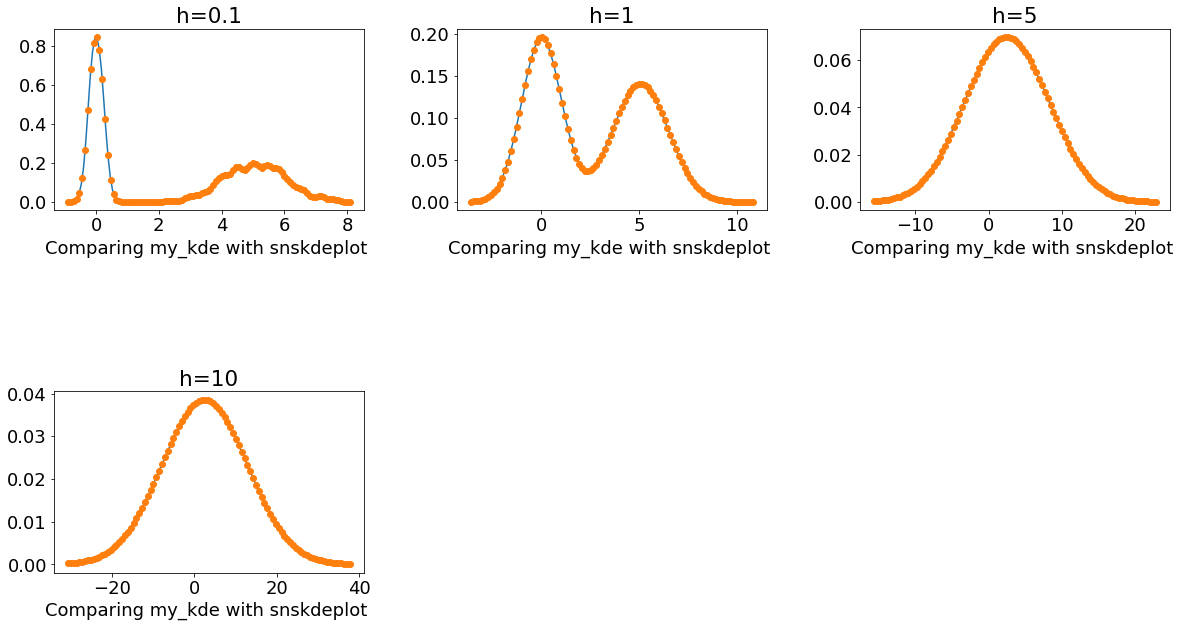

In [459]:
# Comparing my_kde with snskdeplot with h range [0.1, 1, 5, 10]
bandwidths = [0.1, 1, 5, 10]
fig, ax = plt.subplots(4, figsize=(20, 10))
plt_ind = np.arange(4) + 231

for b, ind in zip(bandwidths, plt_ind):
    x, p = my_kde(X, h = b)
    plt.subplot(ind)
    ax = sns.distplot(X, hist=False, axlabel="Comparing my_kde with snskdeplot ",
                  kde_kws=dict(gridsize=100, bw= b))
    ax.plot(x, p, "o")
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=1, wspace=.3)
plt.show()

### _Analysis_ :- The above grapgh shows us how the data starts smoothening as it passes the bandwidth increases, initially we can visualize both the curves of the graph with the small bandwidth and then as the bandwidth increases the curve starts smoothening shows as the individual curve of it   

In [461]:
#Generate 2d random gaussian data
mu1 = [1,0] 
sig1 = [[0.9 ,0.4],[0.4,0.9]]
x1,y1= np.random.multivariate_normal(mu1,sig1,500).T

mu2 = [0,2.5] 
sig2 = [[0.9 ,0.4],[0.4,0.9]]
x2,y2 = np.random.multivariate_normal(mu1,sig1,500).T

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])


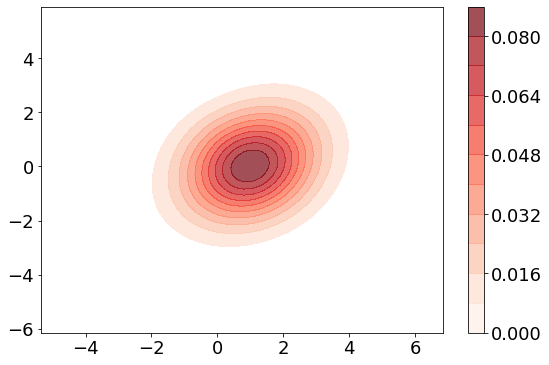

In [462]:
#Visualize the data with kdeplot of Sns to get idea of the data
ax = sns.kdeplot(x, y, bw= 1, cmap="Reds",   shade=True, shade_lowest=False, alpha=0.7, legend=False, cbar=True)

In [464]:
#mykde function, calculates the kernel density estimation for the higher dimenssional data

def mykde(x_samples, h=1, center=[0,0,0]):
    dimensions = x_samples.shape[1]

    assert (len(center) == dimensions)
    k = 0
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return (k / len(x_samples)) / (h**dimensions)


In [465]:
# Generating the 2d gaussian data
mu1 = [1,0] 
sig1 = [[0.9 ,0.4],[0.4,0.9]]
x1= np.random.multivariate_normal(mu1,sig1,500)

mu2 = [0,2.5] 
sig2 = [[0.9 ,0.4],[0.4,0.9]]
x2 = np.random.multivariate_normal(mu1,sig1,500)

X_2d= np.concatenate([x1, x2])


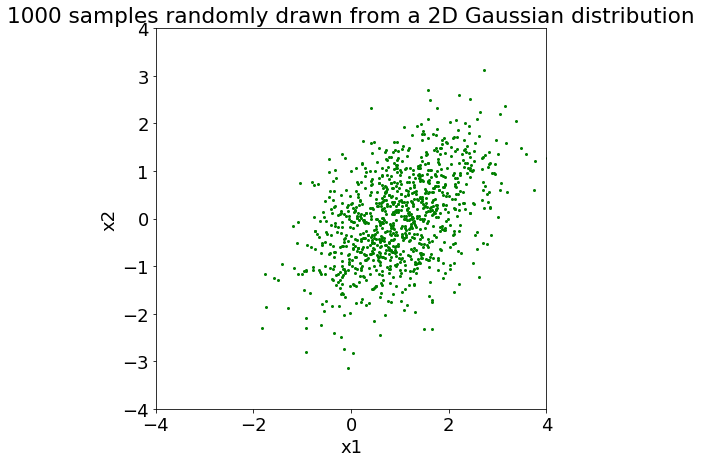

In [469]:
#Scatter plot for the gaussian data

f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_2d[:,0], X_2d[:,1], marker='o', color='green', s=4, alpha=1)
plt.title('1000 samples randomly drawn from a 2D Gaussian distribution')
plt.ylabel('x2')
plt.xlabel('x1')
plt.ylim([-4,4])
plt.xlim([-4,4])
plt.show()

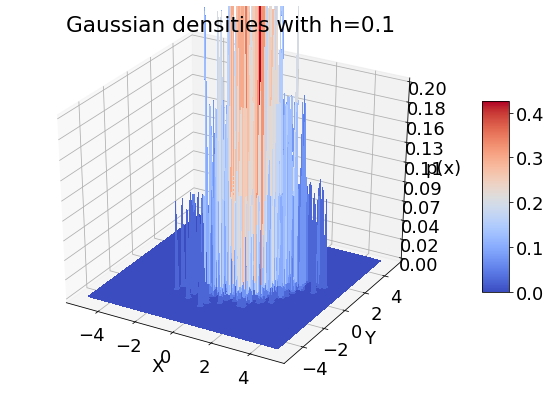

In [471]:
# 3d plot of the 2d gaussian data, 

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)

Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(mykde(X_2d, h=0.1, center=[i, j]))

Z = np.asarray(Z).reshape(100,100)    
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Gaussian density with h=0.1')

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)


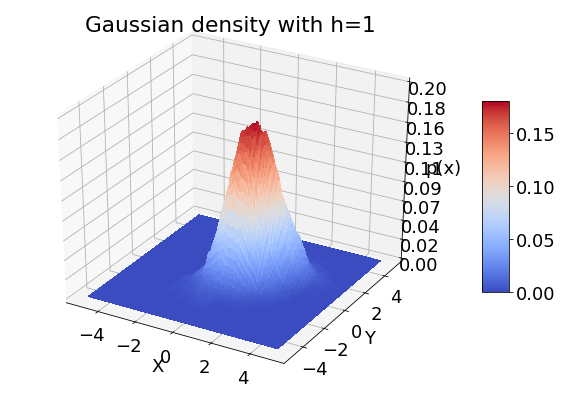

In [472]:
# with the bandwidth h=1

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)

Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(mykde(X_2d, h=1, center=[i, j]))

Z = np.asarray(Z).reshape(100,100)    
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Gaussian density with h=1')

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)


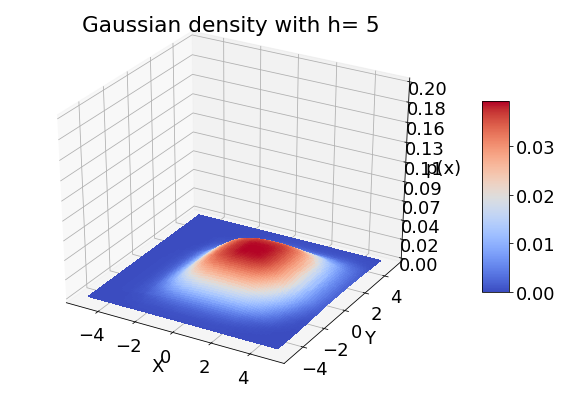

In [473]:
# Gaussian data with the bandwidth h=5

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)

Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(mykde(X_2d, h=5, center=[i, j]))

Z = np.asarray(Z).reshape(100,100)    
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Gaussian density with h= 5')

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)


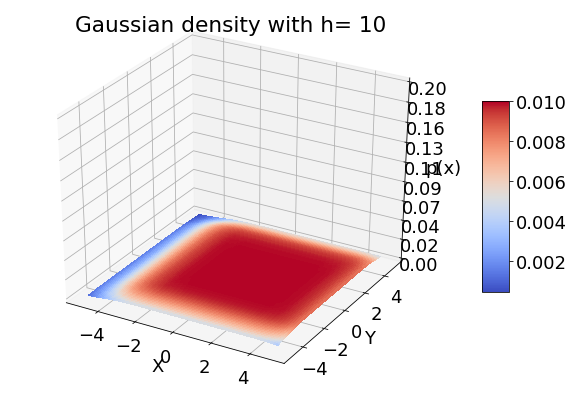

In [474]:
# Gaussian data with the bandwidth h=10

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)

Z = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z.append(mykde(X_2d, h=10, center=[i, j]))

Z = np.asarray(Z).reshape(100,100)    
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Gaussian density with h= 10')

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)


#### _Analysis_ :-  With the 2d gaussian data, the graphical plot shows its detailed with all the points on the curve and as the bandwidth increases the Curve starts smoothening and its like smooth curve for the higher bandwidth 